<a href="https://colab.research.google.com/github/vsilchev/hse-time-series/blob/master/TS_Stationarity_and_Power_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Stationarity and Power Spectrum

Libraries in use:
pandas
seaborn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', palette='Set2')

In [0]:
obs_ts = pd.read_csv("FRB_H10.csv", parse_dates=['date'], na_values='ND')

In [12]:
obs_ts.shape

(5500, 2)

In [13]:
obs_ts.head()

,date,rate
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636
3,1999-01-07,1.1672
4,1999-01-08,1.1554


In [14]:
obs_ts.dtypes

date    datetime64[ns]
rate           float64
dtype: object

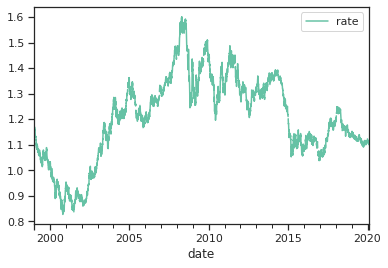

In [15]:
obs_ts.plot('date', 'rate');

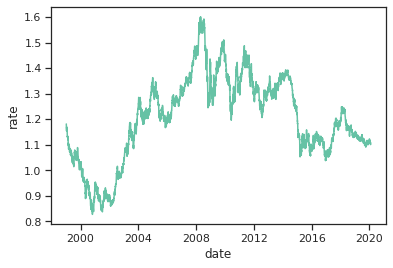

In [16]:
sns.lineplot(x='date', y='rate', data=obs_ts);

In [0]:
# obs_ts.dropna()
obs_ts_new = obs_ts.fillna(value=1.0)

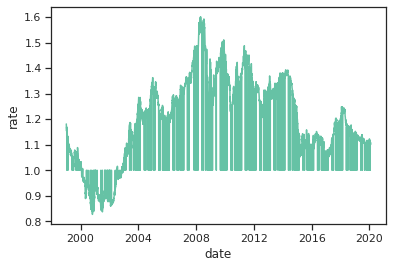

In [54]:
sns.lineplot(x='date', y='rate', data=obs_ts_new);

In [0]:
fft_coef = np.fft.rfft(obs_ts_new['rate'])

In [0]:
ps_coef = np.abs(fft_coef)**2

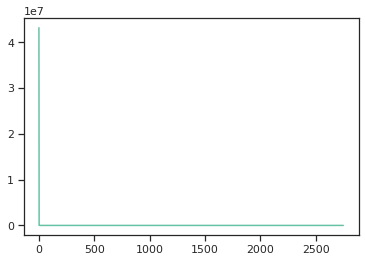

In [57]:
plt.plot(ps_coef)

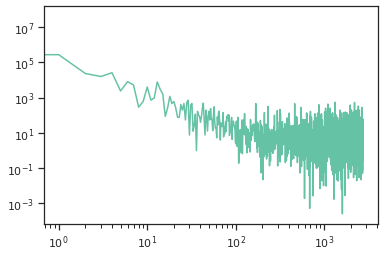

In [58]:
plt.loglog(ps_coef)

In [0]:
white_noize_ts = np.random.uniform(0.8, 1.6, 5500)

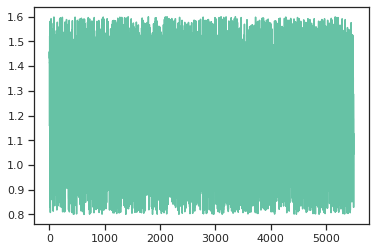

In [60]:
plt.plot(white_noize_ts)

In [0]:
white_noize_ps = np.abs(np.fft.rfft(white_noize_ts))**2

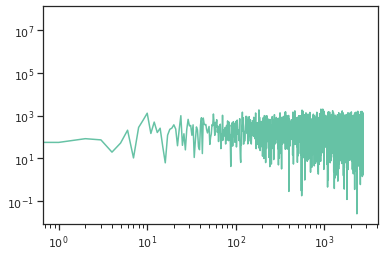

In [62]:
plt.loglog(white_noize_ps)

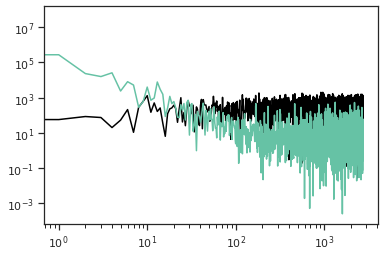

In [63]:
plt.loglog(white_noize_ps, c='black')
plt.loglog(ps_coef)
plt.show()